In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from func import *


In [2]:
data_path = "./data/"

train = pd.read_csv(data_path + "train.csv", index_col="id")
test = pd.read_csv(data_path + "test.csv", index_col="id")
submission = pd.read_csv(data_path + "sample_submission.csv", index_col="id")

In [3]:
# 데이터 크기 확인 
print(f"학습 데이터 shape: {train.shape}")
print(f"평가 데이터 shape: {test.shape}")

학습 데이터 shape: (595212, 58)
평가 데이터 shape: (892816, 57)


features가 상당히 많다...

In [4]:
# 학습 데이터 확인
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_bin 

In [6]:
train.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# 평가 데이터 확인 
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892816 entries, 0 to 1488026
Data columns (total 57 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ps_ind_01       892816 non-null  int64  
 1   ps_ind_02_cat   892816 non-null  int64  
 2   ps_ind_03       892816 non-null  int64  
 3   ps_ind_04_cat   892816 non-null  int64  
 4   ps_ind_05_cat   892816 non-null  int64  
 5   ps_ind_06_bin   892816 non-null  int64  
 6   ps_ind_07_bin   892816 non-null  int64  
 7   ps_ind_08_bin   892816 non-null  int64  
 8   ps_ind_09_bin   892816 non-null  int64  
 9   ps_ind_10_bin   892816 non-null  int64  
 10  ps_ind_11_bin   892816 non-null  int64  
 11  ps_ind_12_bin   892816 non-null  int64  
 12  ps_ind_13_bin   892816 non-null  int64  
 13  ps_ind_14       892816 non-null  int64  
 14  ps_ind_15       892816 non-null  int64  
 15  ps_ind_16_bin   892816 non-null  int64  
 16  ps_ind_17_bin   892816 non-null  int64  
 17  ps_ind_18_bin 

In [9]:
test.describe()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,...,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000
mean,1.902371,1.358613,4.413734,0.417361,0.408132,0.393246,0.257191,0.163659,0.185905,0.000373,...,5.438478,1.440265,2.875013,7.540367,0.123720,0.627756,0.554660,0.287796,0.349344,0.152428
std,1.986503,0.663002,2.700149,0.493453,1.355068,0.488471,0.437086,0.369966,0.389030,0.019309,...,2.330081,1.200620,1.694072,2.745882,0.329262,0.483403,0.497004,0.452736,0.476763,0.359435
min,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,20.000000,11.000000,15.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


학습 데이터와 평가 데이터 모두 결측치가 없어보이지만, 실제로 -1값이 결측치를 나타내고 있다.

"Values of -1 indicate that the feature was missing from the observation"

In [10]:
# 학습 데이터의 결측값(-1)을 np.NaN으로 변환 
train_copy = train.copy().replace(-1, np.nan)

In [11]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   594996 non-null  float64
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595129 non-null  float64
 5   ps_ind_05_cat   589403 non-null  float64
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_bin 

<Axes: >

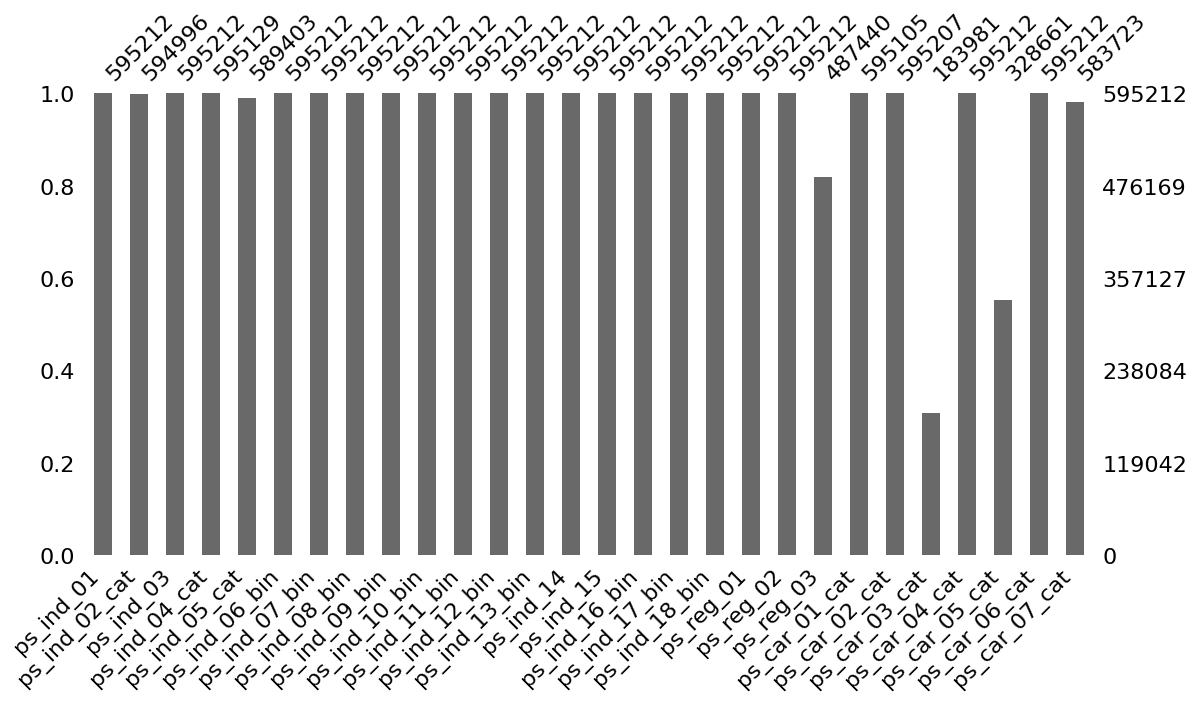

In [12]:
# 결측치 시각화 01: [1:29]
msno.bar(df=train_copy.iloc[:, 1:29], figsize=(13, 6))

그래프 높이가 낮다는 것은 결측치가 많다는 것을 의미한다.

- ps_car_03_cat
- ps_car_05_cat
- ps_reg_03

위 3 features에 결측치가 많다.

<Axes: >

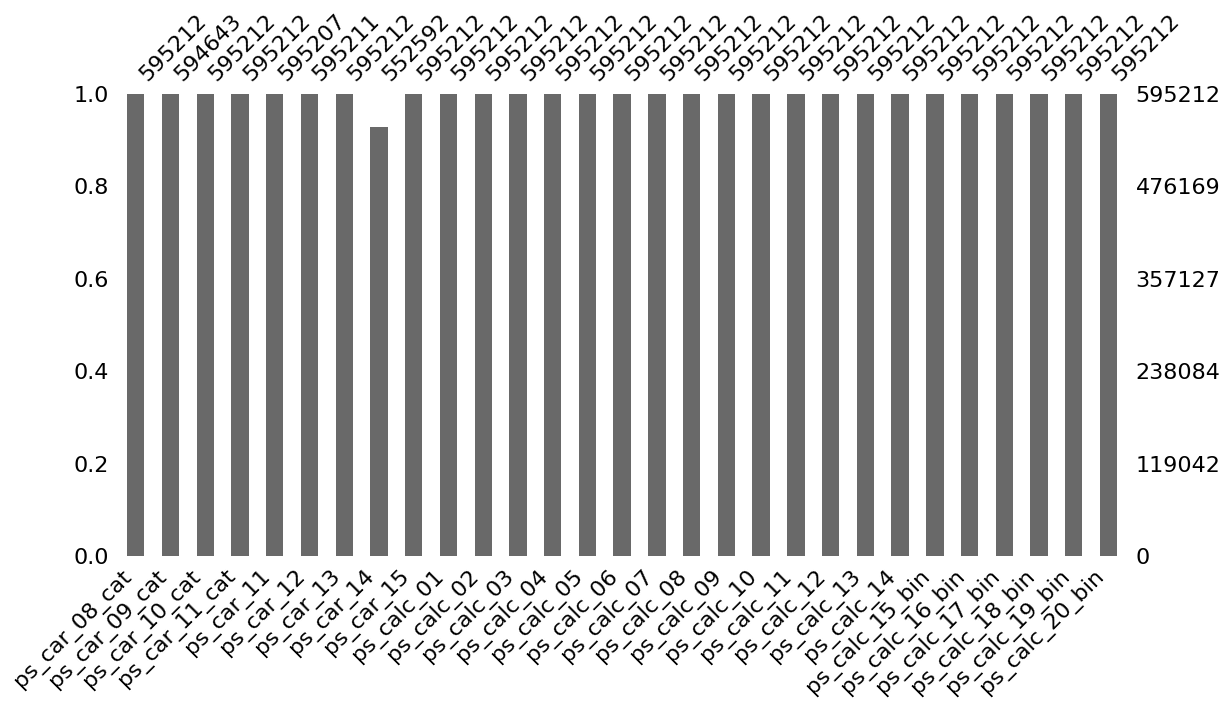

In [13]:
# 결측치 시각화 02: [29:]
msno.bar(df=train_copy.iloc[:, 29:], figsize=(13, 6))

ps_car_14 feature에 결측치가 조금 (상대적) 존재한다.

In [14]:
# 학습 데이터 feature 요약표
summary = resumetable(train)
summary

데이터셋 형상: (595212, 58)


,데이터 타입,결측치 개수,고윳값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


In [15]:
# 명목형 feature 추출 
cond = summary["데이터 종류"] == "명목형"
summary[cond].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [16]:
# 실수형 feature 추출
cond = summary["데이터 타입"] == "float64"
summary[cond].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

# 8.2.2 데이터 시각화

In [17]:
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt 

## 타겟 값 비율

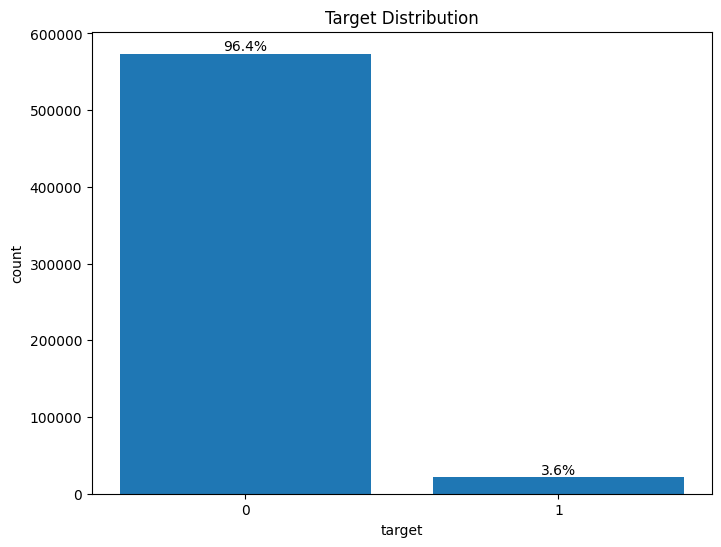

In [18]:
target_distribution(train, target='target', figsize=(8,6))

## 바이너리

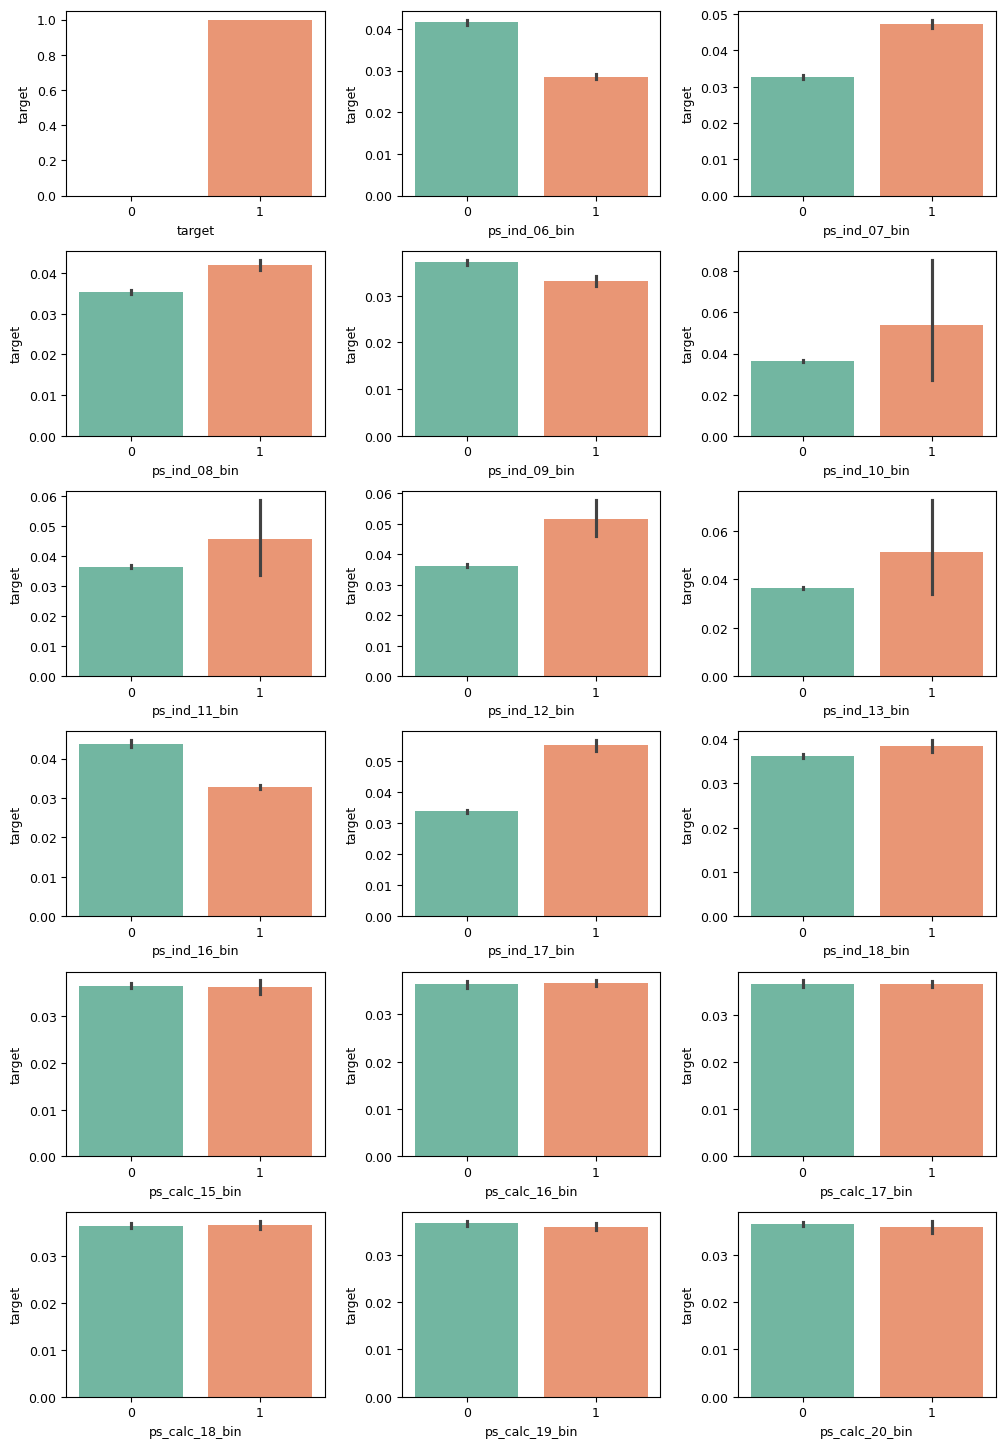

In [19]:
bin_features = summary[summary["데이터 종류"] == "이진형"].index
plot_target_ratio_by_features(train, bin_features, 6, 3)

#### 바이너리 변수 드롭 조건 
1. 신뢰구간이 큰 경우.
  > - ps_ind_10_bin
  > - ps_ind_11_bin
  > - ps_ind_12_bin
  > - ps_ind_13_bin
2. 변수 값에 따른 타겟 값의 비율이 차이가 나지 않는 경우.
  > - ps_calc_15_bin
  > - ps_calc_16_bin
  > - ps_calc_17_bin
  > - ps_calc_18_bin
  > - ps_calc_19_bin
  > - ps_calc_20_bin

## nominal

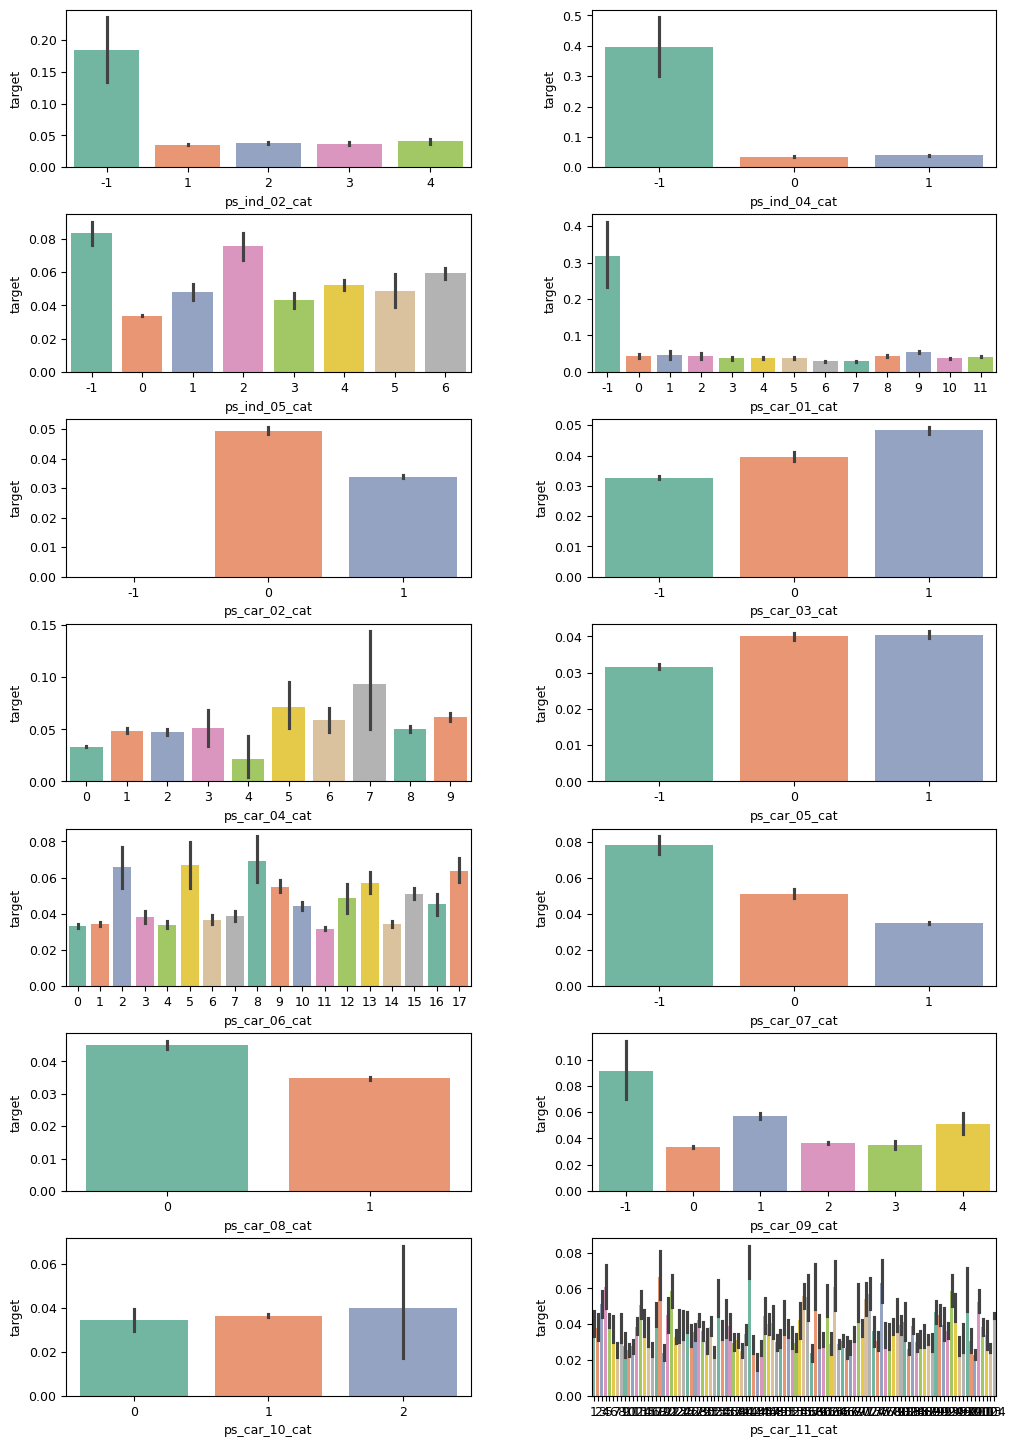

In [20]:
# 명목형 피쳐
nom_features = summary[summary["데이터 종류"] == "명목형"].index 
plot_target_ratio_by_features(train, nom_features, 7, 2)

## ordinal

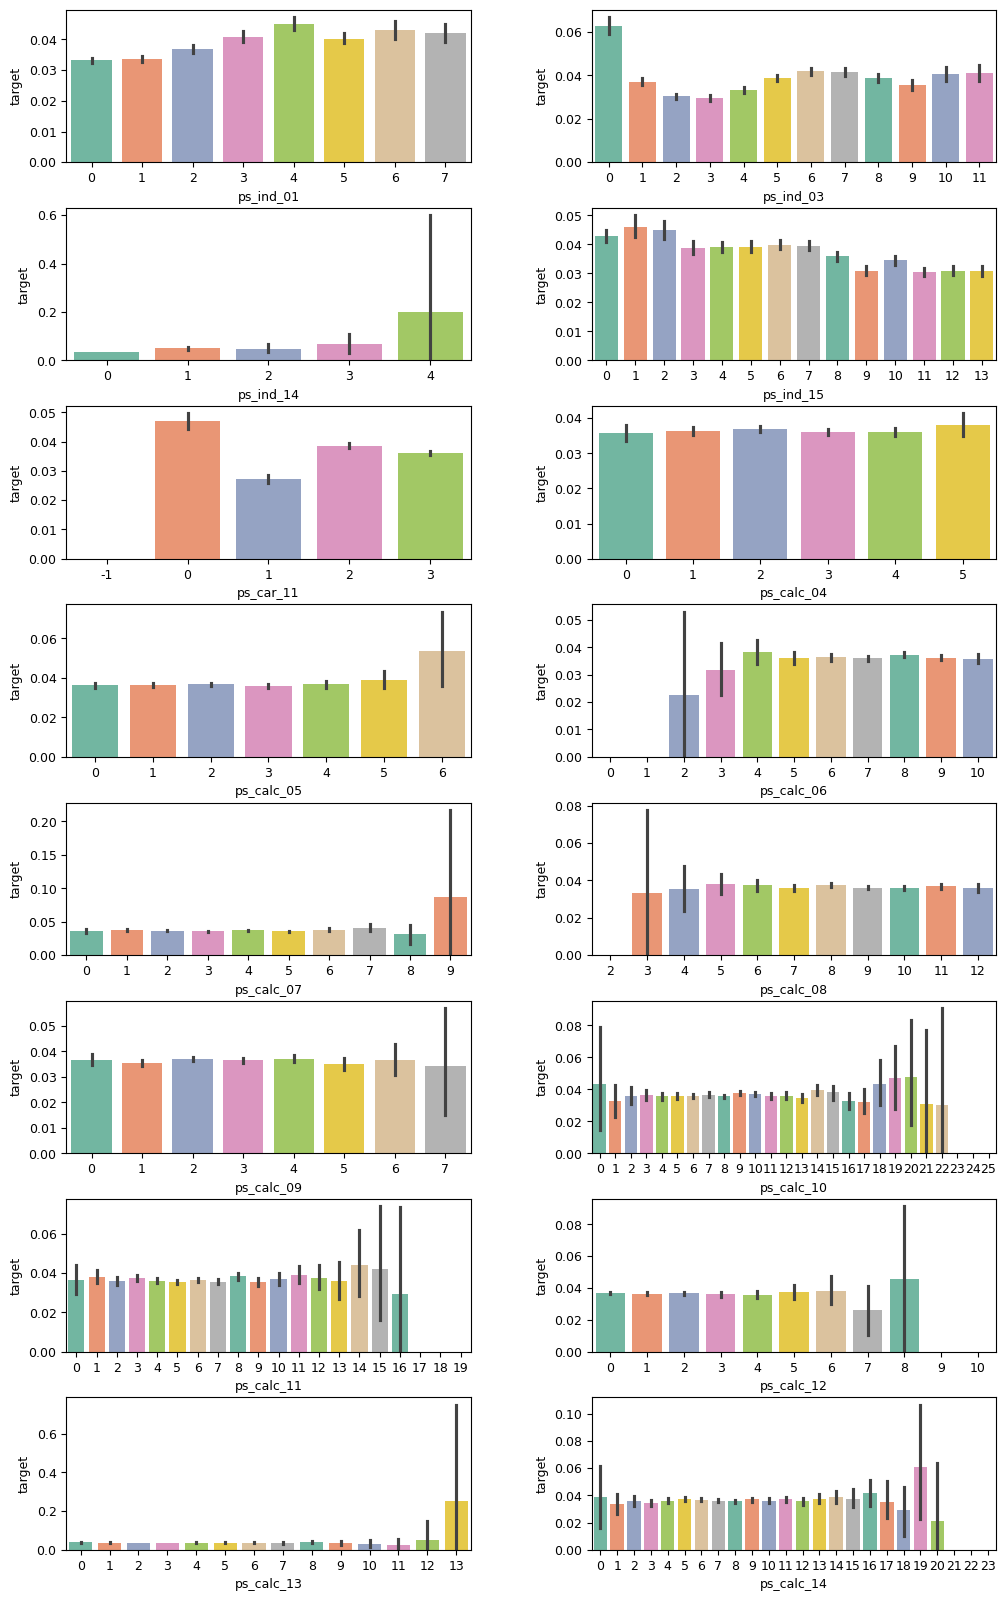

In [21]:
# 순서형 
ord_features = summary[summary["데이터 종류"] == "순서형"].index

plot_target_ratio_by_features(train, ord_features, 8, 2, (12, 20))

## continous

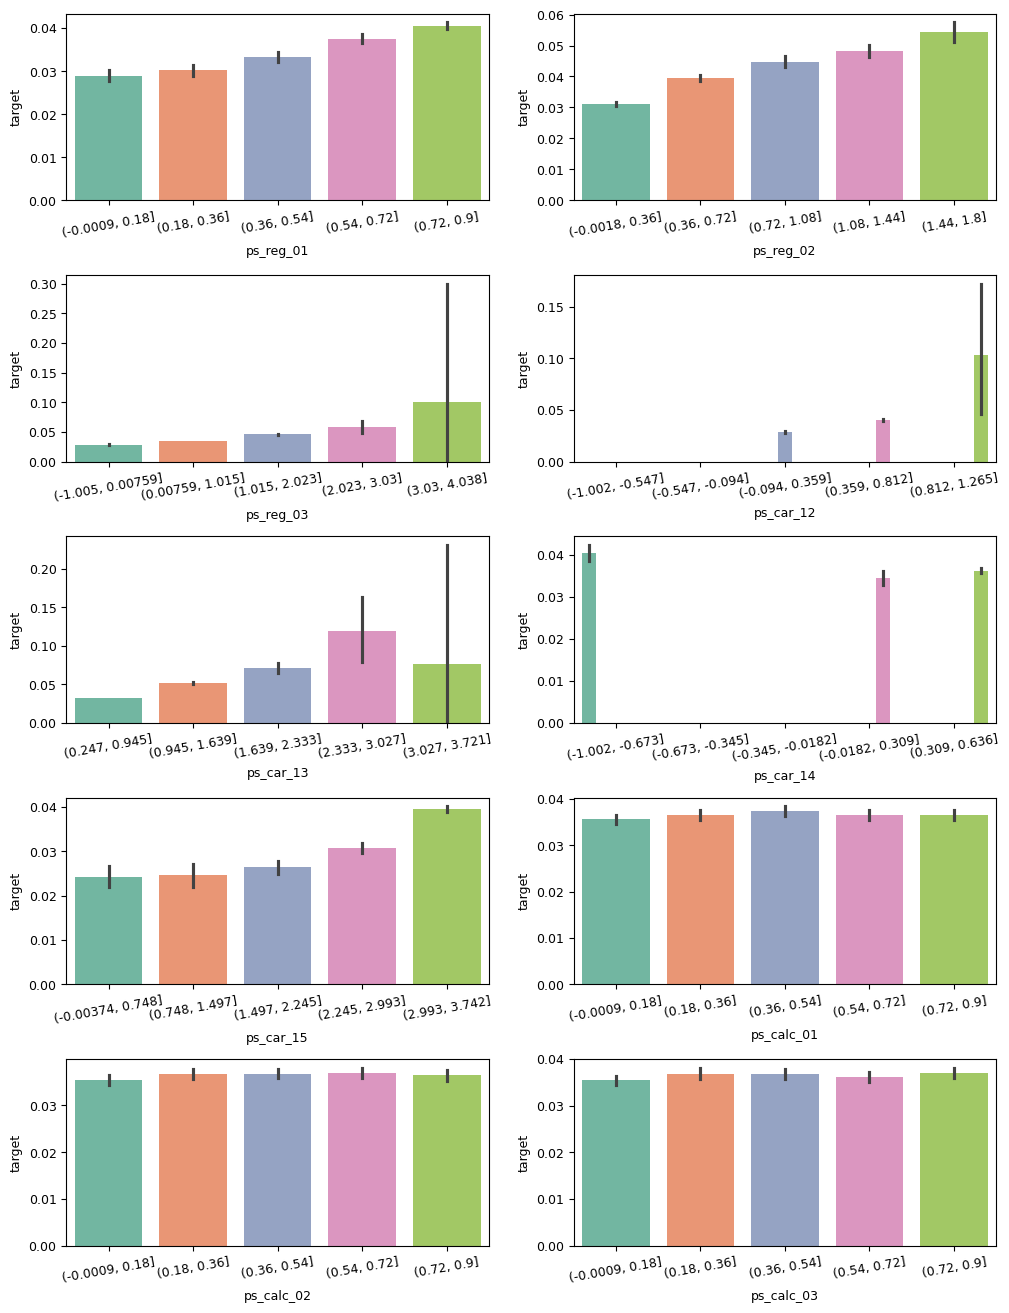

In [22]:
# 연속형 피쳐
cont_features = summary[summary["데이터 종류"] == "연속형"].index

plt.figure(figsize=(12, 16))
grid = gridspec.GridSpec(5, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for idx, cont_feature in enumerate(cont_features):
    # 값을 5개 구간으로 나누기 
    train[cont_feature] = pd.cut(train[cont_feature], 5)
    ax = plt.subplot(grid[idx])
    sns.barplot(x=cont_feature, y="target", hue=cont_feature, data=train, palette="Set2", ax=ax)
    ax.legend().remove()
    ax.tick_params(axis='x', labelrotation=10)

### correlation of contious features

In [23]:
train_dropna = train_copy.dropna()

<Axes: >

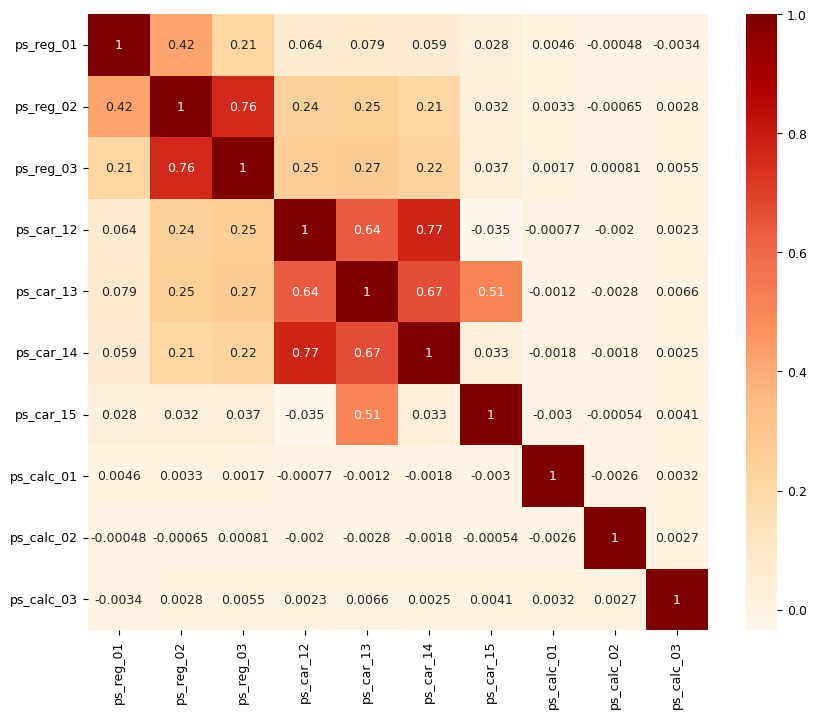

In [24]:
# heatmap 
plt.figure(figsize=(10, 8))
cont_corr = train_dropna[cont_features].corr()
sns.heatmap(cont_corr, annot=True, cmap="OrRd")

# 8.3 베이스라인 모델

LightGBM

## 8.3.1 피쳐 엔지니어링

In [25]:
data_path = "./data/"

train = pd.read_csv(data_path + "train.csv", index_col="id")
test = pd.read_csv(data_path + "test.csv", index_col="id")
submission = pd.read_csv(data_path + "sample_submission.csv", index_col="id")

In [26]:
# 데이터 합치기: train + test 
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1)  # drop target column 

In [27]:
all_features = all_data.columns

In [28]:
# one-hot encoding: nominal features
from sklearn.preprocessing import OneHotEncoder

# extract nominal features 
cat_features = [feature for feature in all_features if 'cat' in feature]

onehot_encoder = OneHotEncoder()

# encoding 
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

encoded_cat_matrix

<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

In [29]:
# drop unnecessary columns 
drop_features = [
    'ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin',
    'ps_ind_12_bin', 'ps_int_13_bin', 'ps_car_14'
    ]

# 유지할 columns: not 'cat', not 'calc' and not drop features
remaining_features = [
    feature for feature in all_features
    if ('cat' not in feature and 
        'calc' not in feature and 
        feature not in drop_features)
]
len(remaining_features)

18

In [30]:
all_data[remaining_features].iloc[:, -8:].head(10)

,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_15
0,0,0.7,0.2,0.718070,2,0.400000,0.883679,3.605551
1,1,0.8,0.4,0.766078,3,0.316228,0.618817,2.449490
2,0,0.0,0.0,-1.000000,1,0.316228,0.641586,3.316625
3,0,0.9,0.2,0.580948,1,0.374166,0.542949,2.000000
4,0,0.7,0.6,0.840759,3,0.316070,0.565832,2.000000
5,0,0.9,1.8,2.332649,2,0.445982,0.879049,3.000000
6,0,0.6,0.1,0.617454,2,0.316228,0.639683,3.162278
7,0,0.7,0.4,0.607248,3,0.446990,0.900574,3.316625
8,0,0.9,0.7,0.901388,3,0.400000,0.780641,2.828427
9,1,0.9,1.4,2.316652,2,0.447214,1.458184,3.605551


In [31]:
all_data[remaining_features].iloc[:, -8:].tail(10)

,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_15
1488018,0,0.1,0.1,-1.000000,3,0.374166,0.812963,3.464102
1488019,1,0.2,0.1,-1.000000,2,0.400000,1.012096,3.741657
1488020,0,0.9,0.4,0.603635,3,0.316228,0.617580,2.645751
1488021,0,0.8,0.2,0.606218,2,0.399750,0.495142,0.000000
1488022,0,0.8,0.4,0.862772,1,0.316228,0.541669,3.000000
1488023,1,0.5,0.3,1.048809,2,0.565685,1.528774,3.605551
1488024,0,0.7,1.0,1.246495,2,0.424264,1.040567,3.741657
1488025,1,0.4,0.0,0.609303,2,0.374166,0.968992,3.741657
1488026,0,0.6,0.6,0.920937,3,0.387298,0.725125,2.645751
1488027,0,0.9,0.8,0.992157,1,0.316228,0.637175,3.316625


In [32]:
all_data[remaining_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488028 entries, 0 to 1488027
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   ps_ind_01      1488028 non-null  int64  
 1   ps_ind_03      1488028 non-null  int64  
 2   ps_ind_06_bin  1488028 non-null  int64  
 3   ps_ind_07_bin  1488028 non-null  int64  
 4   ps_ind_08_bin  1488028 non-null  int64  
 5   ps_ind_09_bin  1488028 non-null  int64  
 6   ps_ind_13_bin  1488028 non-null  int64  
 7   ps_ind_15      1488028 non-null  int64  
 8   ps_ind_16_bin  1488028 non-null  int64  
 9   ps_ind_17_bin  1488028 non-null  int64  
 10  ps_ind_18_bin  1488028 non-null  int64  
 11  ps_reg_01      1488028 non-null  float64
 12  ps_reg_02      1488028 non-null  float64
 13  ps_reg_03      1488028 non-null  float64
 14  ps_car_11      1488028 non-null  int64  
 15  ps_car_12      1488028 non-null  float64
 16  ps_car_13      1488028 non-null  float64
 17  ps_car_1

In [33]:
from scipy import sparse 

all_data_sprs = sparse.hstack(
    [
        sparse.csr_matrix(all_data[remaining_features]),
        encoded_cat_matrix
    ],
    format='csr'
    )
all_data_sprs

<1488028x202 sparse matrix of type '<class 'numpy.float64'>'
	with 37630466 stored elements in Compressed Sparse Row format>

In [34]:
# train-test-split 
num_train = len(train)
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

print(X.shape)
print(X_test.shape)
print(len(y))

(595212, 202)
(892816, 202)
595212


### 8.3.2 평가지표 계산 함수 작성

#### 지니계수 (Gini Coefficient)
---
머신러닝에서 두 가지 주요 측면에서 활용된다.
1. 지니 불순도(Gini Impurity)  
- 개념: Decisition Tree 알고리즘에서 노드의 순도를 측정하는 지표이다. 각 노드에서 데이터가 얼마나 혼합되어 있는지를 나타낸다.
2. 모델 평가 지표로서의 지니계수
- 개념: 분류 모델의 예측 성능, 특히 binary classification에서의 분별력을 측정하는 데 사용된다.
- 계산 방법: 로렌츠 곡선을 기반으로 지니계수를 산출하며, AUROC(Area Under Receiver Operating Characteristic)의 변형으로 이해할 수 있다.

In [35]:
# 정규화 지니계수 계산 함수 
# 정규화 지니계수 = 예측 값에 대한 지니계수 / 예측이 완벽할 때의 지니계수

In [36]:
def eval_gini(y_true, y_pred):
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]  # 데이터 개수 
    L_mid = np.linspace(1 / n_samples, 1, n_samples)  # 대각선 값

    # 1. 예측 값에 대한 지니계수 
    pred_order = y_true[y_pred.argsort()]  # y_pred 크기 순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order)  # 로렌츠 곡선
    G_pred = np.sum(L_mid - L_pred)  # 예측 값에 대한 지니 계수 

    # 2. 예측이 완벽할 때의 지니계수 
    true_order = y_true[y_true.argsort()]  # y_true 크기 순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order)  # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true)  # 예측이 완벽할 때의 지니계수 

    # 정규화 된 지니계수
    return G_pred / G_true

In [37]:
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True 

In [38]:
# OOF 방식으로 LightGBM 훈련

from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

In [39]:
params = {
    'objective': "binary",
    'learning_rate': 0.01,
    'force_row_wise': True,
    'random_state': 0
}

In [40]:
# OOF 방식으로 훈련된 모델로 검증 데이터 타겟 값을 예측한 확률을 담을 1차원 배열 
oof_val_preds = np.zeros(X.shape[0])
# OOF 방식으로 훈련된 모델로 테스트 데이터 타겟 값을 예측한 확률을 담을 1차원 배열
oof_test_preds =np.zeros(X_test.shape[0])

In [41]:
import lightgbm as lgb 

# OOF 방식으로 모델 훈련, 검증, 예측

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print("#"*40, f"{idx+1} fold / {folds.n_splits} folds", "#"*40)

    # train / validation data
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)

    # LightGBM 모델 훈련
    lgb_model = lgb.train(
        params=params,
        train_set=dtrain,
        num_boost_round=1000,
        valid_sets=dvalid,
        feval = gini,
        early_stopping_rounds=100,
        verbose_eval=100
    )


    # 테스트 데이터를 활용해 OOF 예측 
    oof_test_preds += lgb_model.predict(X_test) / folds.n_splits

    # 모델 성능 평가를 위한 검증 데이터 타겟값 예측 
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)

    # 검증 데이터 예측 확률에 대한 정규화 지니계수 
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f"fold {idx+1} 지니계수: {gini_score}\n")

######################################## 1 fold / 5 folds ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1097
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 201
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.153358	valid_0's gini: 0.261508
[200]	valid_0's binary_logloss: 0.152422	valid_0's gini: 0.276384
[300]	valid_0's binary_logloss: 0.152014	valid_0's gini: 0.283146
[400]	valid_0's binary_logloss: 0.15178	valid_0's gini: 0.287765
[500]	valid_0's binary_logloss: 0.151696	valid_0's gini: 0.288879
[600]	valid_0's binary_logloss: 0.151658	valid_0's gini: 0.289473
[700]	valid_0's binary_logloss: 0.151658	valid_0's gini: 0.289474
Early stopping, best iteration is:
[634]	va

params['feval'] 값에 eval_gini가 아닌 일반 gini를 사용하는 이유: 

eval_gini()는 정규화된 지니계수 값을 계산하는 함수이고,  
gini()는 세 가지 값을 반환하는 함수로, 모델 훈련 시 사용하는 검증용 평가 함수이다.  

**feval** (callable, list of callable, or None, optional (default=None)) –  
Customized evaluation function. Each evaluation function should accept two parameters:  
preds, eval_data, and return (eval_name, eval_result, is_higher_better) or list of such tuples.

-> params['feval'] 값에는 반환 값이 3가지(eval_name, eval_result, is_higher_better)인 커스텀 평가 함수를 할당한다.

In [42]:
print(f"OOF 검증 데이터 지니계수: {eval_gini(y, oof_val_preds)}")

OOF 검증 데이터 지니계수: 0.28065217728572844
